In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#%matplotlib inline
# importing all the required libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# connecting data from the drive

Mounted at /content/drive


In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/ML Data/yellow_tripdata_october1.csv" , low_memory=False)
df1 # displaying data from the drive .csv file

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-10-01 00:09:08,2020-10-01 00:11:05,1.0,0.00,1.0,N,145,145,2.0,3.00,0.5,0.5,0.00,0.00,0.3,4.30,0.0
1,1.0,2020-10-01 00:09:19,2020-10-01 00:19:46,1.0,2.00,1.0,Y,238,143,2.0,9.50,3.0,0.5,0.00,0.00,0.3,13.30,2.5
2,1.0,2020-10-01 00:30:00,2020-10-01 00:39:05,1.0,2.10,1.0,N,264,230,1.0,9.00,3.0,0.5,2.56,0.00,0.3,15.36,2.5
3,2.0,2020-10-01 00:56:46,2020-10-01 00:57:10,1.0,0.00,1.0,N,264,152,3.0,-2.50,-0.5,-0.5,0.00,0.00,-0.3,-3.80,0.0
4,2.0,2020-10-01 00:56:46,2020-10-01 00:57:10,1.0,0.00,1.0,N,264,152,1.0,2.50,0.5,0.5,0.00,0.00,0.3,3.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681126,NaN,2020-10-05 18:41:00,2020-10-05 19:11:00,NaN,10.08,NaN,NaN,129,143,NaN,26.33,0.0,0.5,2.75,6.12,0.3,36.00,0.0
1681127,NaN,2020-10-05 18:02:09,2020-10-05 18:51:48,NaN,13.20,NaN,NaN,140,188,NaN,35.06,0.0,0.5,2.75,6.12,0.3,44.73,0.0
1681128,NaN,2020-10-05 18:06:48,2020-10-05 18:17:53,NaN,1.99,NaN,NaN,69,116,NaN,17.75,0.0,0.5,2.75,0.00,0.3,21.30,0.0
1681129,NaN,2020-10-05 18:48:50,2020-10-05 19:05:08,NaN,2.97,NaN,NaN,168,212,NaN,18.74,0.0,0.5,2.75,0.00,0.3,22.29,0.0


In [4]:
df2 = df1.dropna() #dropping NA values
df2


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-10-01 00:09:08,2020-10-01 00:11:05,1.0,0.00,1.0,N,145,145,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1.0,2020-10-01 00:09:19,2020-10-01 00:19:46,1.0,2.00,1.0,Y,238,143,2.0,9.5,3.0,0.5,0.00,0.0,0.3,13.30,2.5
2,1.0,2020-10-01 00:30:00,2020-10-01 00:39:05,1.0,2.10,1.0,N,264,230,1.0,9.0,3.0,0.5,2.56,0.0,0.3,15.36,2.5
3,2.0,2020-10-01 00:56:46,2020-10-01 00:57:10,1.0,0.00,1.0,N,264,152,3.0,-2.5,-0.5,-0.5,0.00,0.0,-0.3,-3.80,0.0
4,2.0,2020-10-01 00:56:46,2020-10-01 00:57:10,1.0,0.00,1.0,N,264,152,1.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575213,2.0,2020-10-31 23:11:43,2020-10-31 23:15:21,1.0,0.83,1.0,N,262,236,1.0,5.0,0.5,0.5,1.20,0.0,0.3,10.00,2.5
1575214,2.0,2020-10-31 23:19:11,2020-10-31 23:19:39,1.0,0.12,1.0,N,236,43,2.0,2.5,0.5,0.5,0.00,0.0,0.3,6.30,2.5
1575215,2.0,2020-10-31 23:30:11,2020-11-01 00:06:20,1.0,7.37,1.0,N,239,25,1.0,28.5,0.5,0.5,8.07,0.0,0.3,40.37,2.5
1575216,2.0,2020-10-31 23:09:36,2020-10-31 23:15:34,2.0,1.35,1.0,N,262,140,1.0,6.5,0.5,0.5,1.50,0.0,0.3,11.80,2.5


In [5]:
df2.describe() # describing the data df2

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.575218e+06,1.575218e+06,1.575218e+06,1.575218e+06,1.575218e+06,1.575218e+06,1.575218e+06,1.575218e+06,1.575218e+06,1.575218e+06,1.575218e+06,1.575218e+06,1.575218e+06,1.575218e+06,1.575218e+06
mean,1.684070e+00,1.426552e+00,2.535423e+00,1.027878e+00,1.664058e+02,1.635731e+02,1.273199e+00,1.171162e+01,1.011595e+00,4.935690e-01,1.949907e+00,1.509542e-01,2.970593e-01,1.717711e+01,2.280580e+00
std,4.648852e-01,1.064304e+00,7.941405e+01,5.614400e-01,6.679436e+01,7.111641e+01,4.836505e-01,7.954652e+02,1.218438e+00,7.398613e-02,2.200806e+00,1.196570e+00,4.132624e-02,7.954948e+02,7.407964e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.825000e+02,-4.500000e+00,-5.000000e-01,-8.700000e+01,-1.925000e+01,-3.000000e-01,-1.975500e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.250000e+02,1.120000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.100000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.610000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,5.000000e-01,5.000000e-01,1.920000e+00,0.000000e+00,3.000000e-01,1.380000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,2.740000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.250000e+01,2.500000e+00,5.000000e-01,2.760000e+00,0.000000e+00,3.000000e-01,1.836000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,9.960311e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,9.983100e+05,3.609000e+01,3.300000e+00,4.704400e+02,6.000000e+02,3.000000e-01,9.983256e+05,2.500000e+00


In [6]:
df2.shape # shape of the data (rows, columns)

(1575218, 18)

In [7]:
def remove_pps_outliers(df2): # removing necessary outliers from data
    df_out = pd.DataFrame()
    for key, subdf in df2.groupby('VendorID'): # grouped by VendorID
        m = np.mean(subdf.trip_distance)
        st = np.std(subdf.trip_distance)
        reduced_df = subdf[(subdf.trip_distance> 0 ) & (subdf.trip_distance<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(1510521, 18)

In [8]:
df3.describe() #again describing the data df3

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.510521e+06,1.510521e+06,1.510521e+06,1.510521e+06,1.510521e+06,1.510521e+06,1.510521e+06,1.510521e+06,1.510521e+06,1.510521e+06,1.510521e+06,1.510521e+06,1.510521e+06,1.510521e+06,1.510521e+06
mean,1.708380e+00,1.437518e+00,2.309853e+00,1.015372e+00,1.670352e+02,1.642793e+02,1.268254e+00,1.107462e+01,9.835333e-01,4.949099e-01,1.907954e+00,1.091911e-01,2.973637e-01,1.649297e+01,2.315138e+00
std,4.545084e-01,1.075797e+00,2.632248e+00,3.878723e-01,6.675577e+01,7.066480e+01,4.755705e-01,8.123040e+02,1.198848e+00,6.837045e-02,2.023782e+00,1.039955e+00,3.953227e-02,8.123292e+02,6.894198e-01
min,1.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.825000e+02,-4.500000e+00,-5.000000e-01,-6.300000e+01,-1.925000e+01,-3.000000e-01,-1.975500e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.250000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.357000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,2.630000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.200000e+01,2.500000e+00,5.000000e-01,2.750000e+00,0.000000e+00,3.000000e-01,1.780000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,9.831000e+01,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,9.983100e+05,3.609000e+01,3.300000e+00,4.704400e+02,6.000000e+02,3.000000e-01,9.983256e+05,2.500000e+00


In [9]:
def remove_pps_outliers(df3): #removing outliers
    df_out = pd.DataFrame()
    for key, subdf2 in df3.groupby('VendorID'):
        m = np.mean(subdf2.total_amount)
        st = np.std(subdf2.total_amount)
        reduced_df = subdf2[(subdf2.total_amount> 0 ) & (subdf2.total_amount<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(1409618, 18)

In [10]:
df4.describe() #again describing the data df4

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06
mean,1.687522e+00,1.429123e+00,1.814627e+00,1.004001e+00,1.679961e+02,1.655914e+02,1.261236e+00,9.029995e+00,1.028446e+00,4.996320e-01,1.718163e+00,7.345678e-03,2.999904e-01,1.420318e+01,2.358799e+00
std,4.635035e-01,1.067473e+00,1.159756e+00,3.557331e-01,6.686024e+01,6.979743e+01,4.563084e-01,3.993722e+00,1.214605e+00,1.379876e-02,1.481601e+00,5.561298e-01,1.695001e-03,4.768008e+00,5.771167e-01
min,1.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-01,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,1.250000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.510000e+00,1.000000e+00,1.630000e+02,1.620000e+02,1.000000e+00,8.000000e+00,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.330000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,2.380000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.100000e+01,2.500000e+00,5.000000e-01,2.640000e+00,0.000000e+00,3.000000e-01,1.680000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,8.408000e+01,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.750000e+02,3.609000e+01,3.300000e+00,4.704400e+02,6.000000e+02,3.000000e-01,6.553000e+02,2.500000e+00


In [11]:
def remove_pps_outliers(df4): #removing the outliers
    df_out = pd.DataFrame()
    for key, subdf3 in df4.groupby('RatecodeID'):
        m = np.mean(subdf3.RatecodeID)
        st = np.std(subdf3.RatecodeID)
        reduced_df = subdf3[(subdf3.RatecodeID> 0 ) & (subdf3.RatecodeID<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(1409618, 18)

In [12]:
df5.describe() #describing df5

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06,1.409618e+06
mean,1.687522e+00,1.429123e+00,1.814627e+00,1.004001e+00,1.679961e+02,1.655914e+02,1.261236e+00,9.029995e+00,1.028446e+00,4.996320e-01,1.718163e+00,7.345678e-03,2.999904e-01,1.420318e+01,2.358799e+00
std,4.635035e-01,1.067473e+00,1.159756e+00,3.557331e-01,6.686024e+01,6.979743e+01,4.563084e-01,3.993722e+00,1.214605e+00,1.379876e-02,1.481601e+00,5.561298e-01,1.695001e-03,4.768008e+00,5.771167e-01
min,1.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-01,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,1.250000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.510000e+00,1.000000e+00,1.630000e+02,1.620000e+02,1.000000e+00,8.000000e+00,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.330000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,2.380000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.100000e+01,2.500000e+00,5.000000e-01,2.640000e+00,0.000000e+00,3.000000e-01,1.680000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,8.408000e+01,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.750000e+02,3.609000e+01,3.300000e+00,4.704400e+02,6.000000e+02,3.000000e-01,6.553000e+02,2.500000e+00


In [13]:
index_names = df5[ df5['RatecodeID'] == 99.0 ].index #removing 99.0 outlier from RatecodeID

In [14]:
drop_A=df5.index[df5['RatecodeID'] == 99.0].tolist() # dropping from df5
df6=df5.drop(df5.index[drop_A]) 

In [15]:
df6.shape #shape of row and columns in df6

(1409601, 18)

In [16]:
df6.RatecodeID.describe() #describing ratecodeid 

count    1.409601e+06
mean     1.002819e+00
std      1.035850e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.000000e+00
Name: RatecodeID, dtype: float64

In [17]:
df6 = df5.assign(final_amount= (df5.fare_amount + df5.extra + df5.mta_tax + df5.tip_amount + df5.tolls_amount + df5.improvement_surcharge + df5.congestion_surcharge ))
# merging extra values and sum them in total of 'final_amount'

In [18]:
df6

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,final_amount
0,1.0,2020-10-01 00:09:19,2020-10-01 00:19:46,1.0,2.00,1.0,Y,238,143,2.0,9.5,3.0,0.5,0.00,0.0,0.3,13.30,2.5,15.80
1,1.0,2020-10-01 00:30:00,2020-10-01 00:39:05,1.0,2.10,1.0,N,264,230,1.0,9.0,3.0,0.5,2.56,0.0,0.3,15.36,2.5,17.86
2,1.0,2020-10-01 00:31:00,2020-10-01 00:37:58,1.0,1.50,1.0,N,95,102,2.0,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.0,8.80
3,1.0,2020-10-01 00:37:04,2020-10-01 00:39:07,0.0,0.80,1.0,N,239,238,1.0,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5,12.45
4,1.0,2020-10-01 00:38:44,2020-10-01 00:51:40,1.0,3.80,1.0,N,141,260,2.0,13.0,3.0,0.5,0.00,0.0,0.3,16.80,2.5,19.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409613,2.0,2020-10-27 12:44:48,2020-10-27 12:54:42,1.0,0.83,99.0,N,246,186,2.0,7.5,0.0,0.5,0.00,0.0,0.3,10.80,2.5,10.80
1409614,2.0,2020-10-28 07:52:13,2020-10-28 07:58:51,1.0,0.97,99.0,N,166,43,2.0,6.0,0.0,0.5,0.00,0.0,0.3,6.80,0.0,6.80
1409615,2.0,2020-10-29 10:50:33,2020-10-29 11:06:54,1.0,1.93,99.0,N,230,107,2.0,11.5,0.0,0.5,0.00,0.0,0.3,14.80,2.5,14.80
1409616,2.0,2020-10-30 10:40:17,2020-10-30 10:56:15,1.0,2.04,99.0,N,236,140,2.0,11.5,0.0,0.5,0.00,0.0,0.3,14.80,2.5,14.80


In [19]:
df7 = df6.drop(['extra' , 'mta_tax' , 'tip_amount' , 'tolls_amount' , 'improvement_surcharge' , 'total_amount' , 'congestion_surcharge'] , axis=1)
# droppinng extra columns

In [20]:
df7

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,final_amount
0,1.0,2020-10-01 00:09:19,2020-10-01 00:19:46,1.0,2.00,1.0,Y,238,143,2.0,9.5,15.80
1,1.0,2020-10-01 00:30:00,2020-10-01 00:39:05,1.0,2.10,1.0,N,264,230,1.0,9.0,17.86
2,1.0,2020-10-01 00:31:00,2020-10-01 00:37:58,1.0,1.50,1.0,N,95,102,2.0,7.5,8.80
3,1.0,2020-10-01 00:37:04,2020-10-01 00:39:07,0.0,0.80,1.0,N,239,238,1.0,4.5,12.45
4,1.0,2020-10-01 00:38:44,2020-10-01 00:51:40,1.0,3.80,1.0,N,141,260,2.0,13.0,19.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1409613,2.0,2020-10-27 12:44:48,2020-10-27 12:54:42,1.0,0.83,99.0,N,246,186,2.0,7.5,10.80
1409614,2.0,2020-10-28 07:52:13,2020-10-28 07:58:51,1.0,0.97,99.0,N,166,43,2.0,6.0,6.80
1409615,2.0,2020-10-29 10:50:33,2020-10-29 11:06:54,1.0,1.93,99.0,N,230,107,2.0,11.5,14.80
1409616,2.0,2020-10-30 10:40:17,2020-10-30 10:56:15,1.0,2.04,99.0,N,236,140,2.0,11.5,14.80


In [21]:
def remove_pps_outliers(df7): #removing outliers
    df_out = pd.DataFrame()
    for key, subdf7 in df7.groupby('VendorID'):
        m = np.mean(subdf7.passenger_count)
        st = np.std(subdf7.passenger_count)
        reduced_df = subdf7[(subdf7.passenger_count> 0 )]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df7)
df8.shape

(1380322, 12)

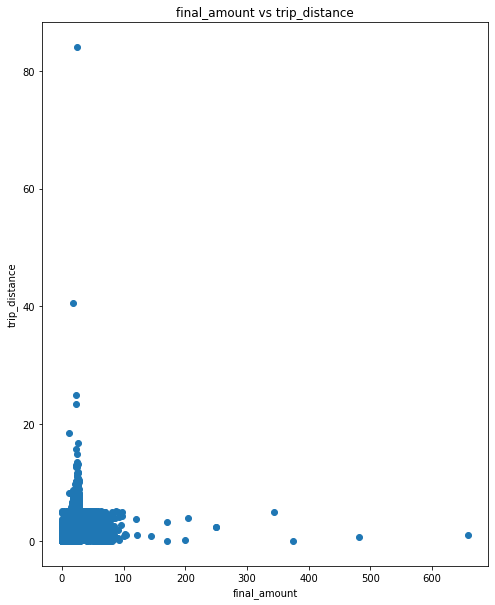

In [109]:
plt.scatter(df7.final_amount, df7.trip_distance) #scatterplot of final_amount vs trip_distance
plt.xlabel('final_amount')
plt.ylabel('trip_distance')
plt.title('final_amount vs trip_distance')
plt.show()

In [23]:
def remove_pps_outliers(df7): #removing outliers
    df_out = pd.DataFrame()
    for key, subdf7 in df7.groupby('VendorID'):
        m = np.mean(subdf7.final_amount)
        st = np.std(subdf7.final_amount)
        reduced_df = subdf7[(subdf7.final_amount> 0 ) & (subdf7.final_amount<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df7)
df8.shape

(1181571, 12)

In [24]:
df8

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,final_amount
0,1.0,2020-10-01 00:09:19,2020-10-01 00:19:46,1.0,2.00,1.0,Y,238,143,2.0,9.5,15.80
1,1.0,2020-10-01 00:30:00,2020-10-01 00:39:05,1.0,2.10,1.0,N,264,230,1.0,9.0,17.86
2,1.0,2020-10-01 00:31:00,2020-10-01 00:37:58,1.0,1.50,1.0,N,95,102,2.0,7.5,8.80
3,1.0,2020-10-01 00:37:04,2020-10-01 00:39:07,0.0,0.80,1.0,N,239,238,1.0,4.5,12.45
4,1.0,2020-10-01 00:38:44,2020-10-01 00:51:40,1.0,3.80,1.0,N,141,260,2.0,13.0,19.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1181566,2.0,2020-10-27 12:44:48,2020-10-27 12:54:42,1.0,0.83,99.0,N,246,186,2.0,7.5,10.80
1181567,2.0,2020-10-28 07:52:13,2020-10-28 07:58:51,1.0,0.97,99.0,N,166,43,2.0,6.0,6.80
1181568,2.0,2020-10-29 10:50:33,2020-10-29 11:06:54,1.0,1.93,99.0,N,230,107,2.0,11.5,14.80
1181569,2.0,2020-10-30 10:40:17,2020-10-30 10:56:15,1.0,2.04,99.0,N,236,140,2.0,11.5,14.80


In [25]:
def remove_pps_outliers(df8): #removing outliers
    df_out = pd.DataFrame()
    for key, subdf8 in df8.groupby('VendorID'):
        m = np.mean(subdf8.passenger_count)
        st = np.std(subdf8.passenger_count)
        reduced_df = subdf8[(subdf8.passenger_count> 0 )]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df9 = remove_pps_outliers(df8)
df9.shape

(1156392, 12)

In [26]:
df9

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,final_amount
0,1.0,2020-10-01 00:09:19,2020-10-01 00:19:46,1.0,2.00,1.0,Y,238,143,2.0,9.5,15.80
1,1.0,2020-10-01 00:30:00,2020-10-01 00:39:05,1.0,2.10,1.0,N,264,230,1.0,9.0,17.86
2,1.0,2020-10-01 00:31:00,2020-10-01 00:37:58,1.0,1.50,1.0,N,95,102,2.0,7.5,8.80
3,1.0,2020-10-01 00:38:44,2020-10-01 00:51:40,1.0,3.80,1.0,N,141,260,2.0,13.0,19.30
4,1.0,2020-10-01 00:38:49,2020-10-01 00:42:03,1.0,1.60,1.0,N,140,233,1.0,6.5,15.46
...,...,...,...,...,...,...,...,...,...,...,...,...
1156387,2.0,2020-10-27 12:44:48,2020-10-27 12:54:42,1.0,0.83,99.0,N,246,186,2.0,7.5,10.80
1156388,2.0,2020-10-28 07:52:13,2020-10-28 07:58:51,1.0,0.97,99.0,N,166,43,2.0,6.0,6.80
1156389,2.0,2020-10-29 10:50:33,2020-10-29 11:06:54,1.0,1.93,99.0,N,230,107,2.0,11.5,14.80
1156390,2.0,2020-10-30 10:40:17,2020-10-30 10:56:15,1.0,2.04,99.0,N,236,140,2.0,11.5,14.80


In [27]:
df9[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df9[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)
# changing datetime column name

In [28]:
df9['new_pickup_date'] = [d.date() for d in df9['tpep_pickup_datetime']] #changing datatype
df9['new_pickup_time'] = [d.time() for d in df9['tpep_pickup_datetime']] #changing datatype

In [29]:
df9['new_dropoff_date'] = [d.date() for d in df9['tpep_dropoff_datetime']] #changing datatype
df9['new_dropoff_time'] = [d.time() for d in df9['tpep_dropoff_datetime']] #changing datatype

In [30]:
df9.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime']) # dropping columns

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,final_amount,new_pickup_date,new_pickup_time,new_dropoff_date,new_dropoff_time
0,1.0,1.0,2.00,1.0,Y,238,143,2.0,9.5,15.80,2020-10-01,00:09:19,2020-10-01,00:19:46
1,1.0,1.0,2.10,1.0,N,264,230,1.0,9.0,17.86,2020-10-01,00:30:00,2020-10-01,00:39:05
2,1.0,1.0,1.50,1.0,N,95,102,2.0,7.5,8.80,2020-10-01,00:31:00,2020-10-01,00:37:58
3,1.0,1.0,3.80,1.0,N,141,260,2.0,13.0,19.30,2020-10-01,00:38:44,2020-10-01,00:51:40
4,1.0,1.0,1.60,1.0,N,140,233,1.0,6.5,15.46,2020-10-01,00:38:49,2020-10-01,00:42:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156387,2.0,1.0,0.83,99.0,N,246,186,2.0,7.5,10.80,2020-10-27,12:44:48,2020-10-27,12:54:42
1156388,2.0,1.0,0.97,99.0,N,166,43,2.0,6.0,6.80,2020-10-28,07:52:13,2020-10-28,07:58:51
1156389,2.0,1.0,1.93,99.0,N,230,107,2.0,11.5,14.80,2020-10-29,10:50:33,2020-10-29,11:06:54
1156390,2.0,1.0,2.04,99.0,N,236,140,2.0,11.5,14.80,2020-10-30,10:40:17,2020-10-30,10:56:15


In [31]:
df10 = df9 # copying data from df9 to df10

In [32]:
column_names = ["VendorID", "new_pickup_date", "new_dropoff_date" , "new_pickup_time" , "new_dropoff_time" , "passenger_count" , "trip_distance" , "RatecodeID" , "store_and_fwd_flag" , "PULocationID" , "DOLocationID" , "payment_type" , "fare_amount" , "final_amount"]

df11 = df10.reindex(columns=column_names) #changing column names

In [33]:
df11

,VendorID,new_pickup_date,new_dropoff_date,new_pickup_time,new_dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,final_amount
0,1.0,2020-10-01,2020-10-01,00:09:19,00:19:46,1.0,2.00,1.0,Y,238,143,2.0,9.5,15.80
1,1.0,2020-10-01,2020-10-01,00:30:00,00:39:05,1.0,2.10,1.0,N,264,230,1.0,9.0,17.86
2,1.0,2020-10-01,2020-10-01,00:31:00,00:37:58,1.0,1.50,1.0,N,95,102,2.0,7.5,8.80
3,1.0,2020-10-01,2020-10-01,00:38:44,00:51:40,1.0,3.80,1.0,N,141,260,2.0,13.0,19.30
4,1.0,2020-10-01,2020-10-01,00:38:49,00:42:03,1.0,1.60,1.0,N,140,233,1.0,6.5,15.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156387,2.0,2020-10-27,2020-10-27,12:44:48,12:54:42,1.0,0.83,99.0,N,246,186,2.0,7.5,10.80
1156388,2.0,2020-10-28,2020-10-28,07:52:13,07:58:51,1.0,0.97,99.0,N,166,43,2.0,6.0,6.80
1156389,2.0,2020-10-29,2020-10-29,10:50:33,11:06:54,1.0,1.93,99.0,N,230,107,2.0,11.5,14.80
1156390,2.0,2020-10-30,2020-10-30,10:40:17,10:56:15,1.0,2.04,99.0,N,236,140,2.0,11.5,14.80


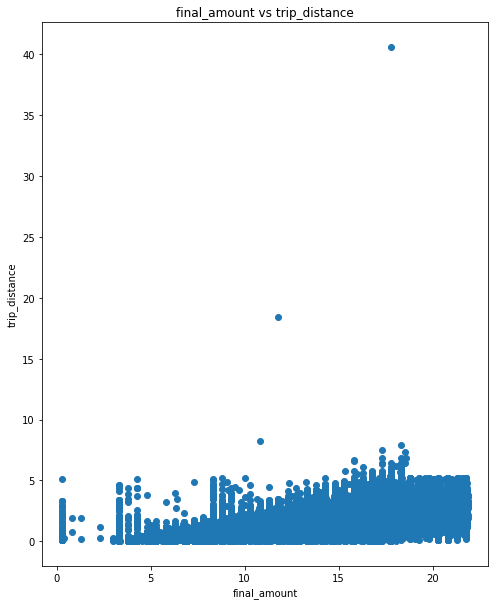

In [110]:
plt.scatter(df11.final_amount, df11.trip_distance) #scatterplot of final_amount vs trip_distance
plt.xlabel('final_amount')
plt.ylabel('trip_distance')
plt.title('final_amount vs trip_distance')
plt.show()

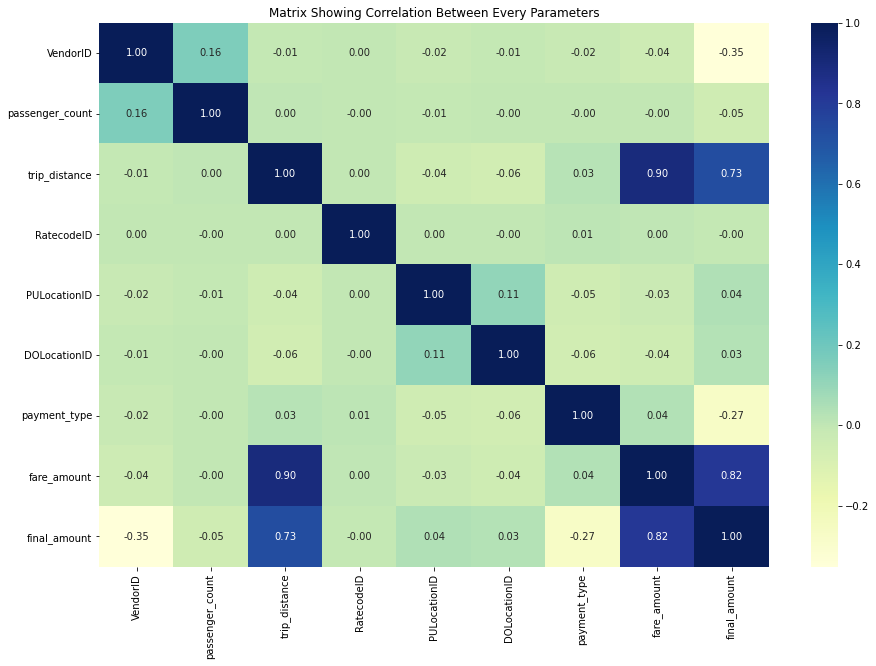

In [35]:
import seaborn as sns #importing library
plt.figure(figsize=(15,10))
ax = plt.axes()
corr = df11.corr()
sns.heatmap(corr, fmt='.2f', annot=True, cmap ="YlGnBu") #making a correlartion and heatmap
ax.set_title('Matrix Showing Correlation Between Every Parameters')
plt.show()

In [36]:
df11.dtypes #describing datatypes

VendorID              float64
new_pickup_date        object
new_dropoff_date       object
new_pickup_time        object
new_dropoff_time       object
passenger_count       float64
trip_distance         float64
RatecodeID            float64
store_and_fwd_flag     object
PULocationID            int64
DOLocationID            int64
payment_type          float64
fare_amount           float64
final_amount          float64
dtype: object

In [37]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) #describing data in float
df11.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,final_amount
count,1156392.00000,1156392.00000,1156392.00000,1156392.00000,1156392.00000,1156392.00000,1156392.00000,1156392.00000,1156392.00000
mean,1.69457,1.45525,1.45801,1.00302,168.66529,166.81094,1.28115,7.74744,13.35972
std,0.46059,1.05240,0.75779,0.36256,66.71650,68.74005,0.46656,2.59603,3.34423
min,1.00000,1.00000,0.01000,1.00000,1.00000,1.00000,1.00000,0.00000,0.30000
25%,1.00000,1.00000,0.90000,1.00000,137.00000,114.00000,1.00000,5.50000,10.80000
50%,2.00000,1.00000,1.32000,1.00000,163.00000,163.00000,1.00000,7.50000,13.30000
75%,2.00000,1.00000,1.90000,1.00000,236.00000,236.00000,2.00000,9.50000,15.80000
max,2.00000,9.00000,40.61000,99.00000,265.00000,265.00000,4.00000,21.00000,21.88000


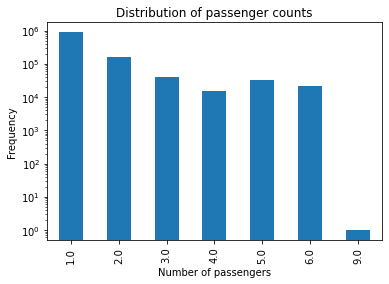

In [38]:
passengers = df11['passenger_count'].value_counts().sort_index()
passengers.plot(kind = 'bar',logy = True) #bar graph of x and y label
plt.xlabel('Number of passengers')
plt.ylabel('Frequency')
plt.title('Distribution of passenger counts')
plt.show()

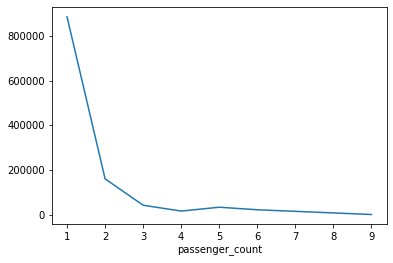

In [39]:
a=df11.groupby('passenger_count').count()['trip_distance'] # line graph 
a.plot()

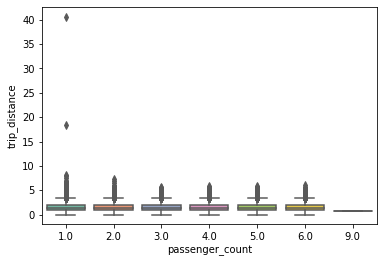

In [40]:
ax = sns.boxplot(x="passenger_count", y="trip_distance", data=df11, palette="Set2") #boxplot analysis

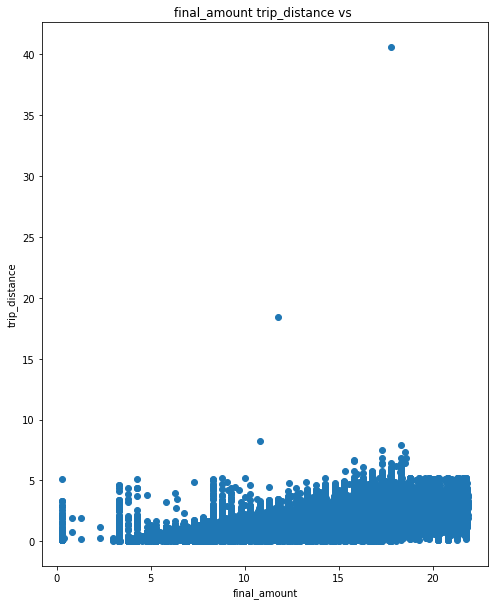

In [111]:
plt.scatter(df11.final_amount, df11.trip_distance) #scatterplot of x and y label
plt.xlabel('final_amount')
plt.ylabel('trip_distance')
plt.title('final_amount trip_distance vs ')
plt.show()

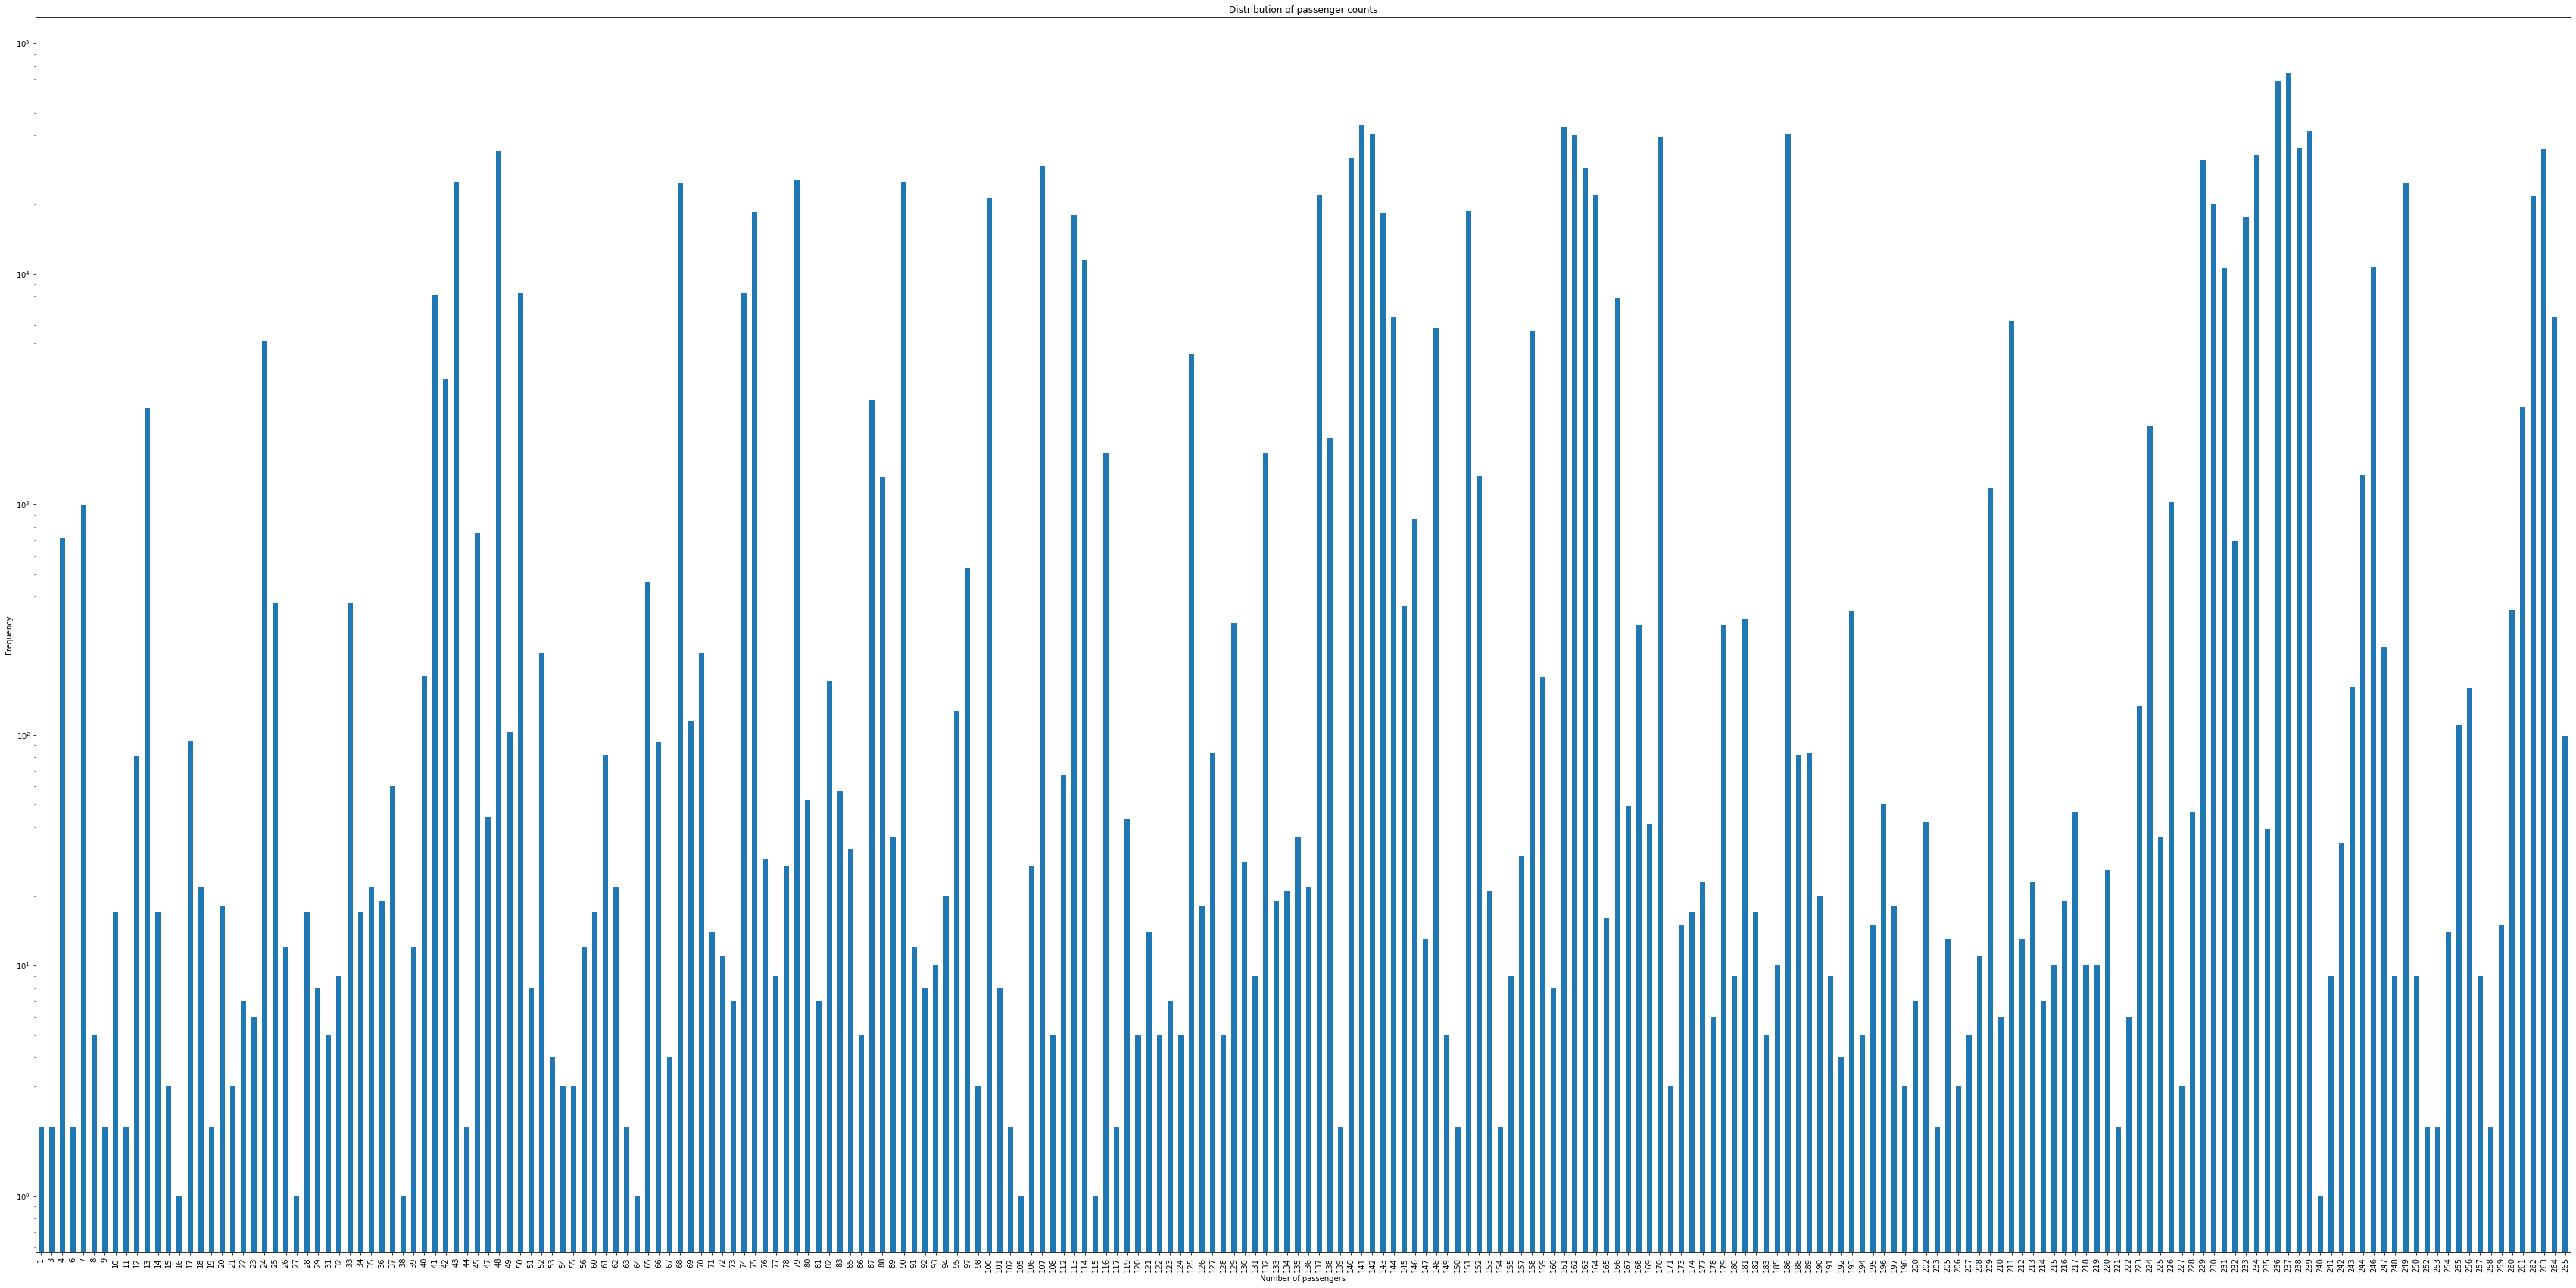

In [42]:
passengers = df11['PULocationID'].value_counts().sort_index()
passengers.plot(kind = 'bar',logy = True, figsize = (60,30)) # bargraph of PULocationID
plt.xlabel('Number of passengers')
plt.ylabel('Frequency')
plt.title('Distribution of passenger counts')
plt.show()

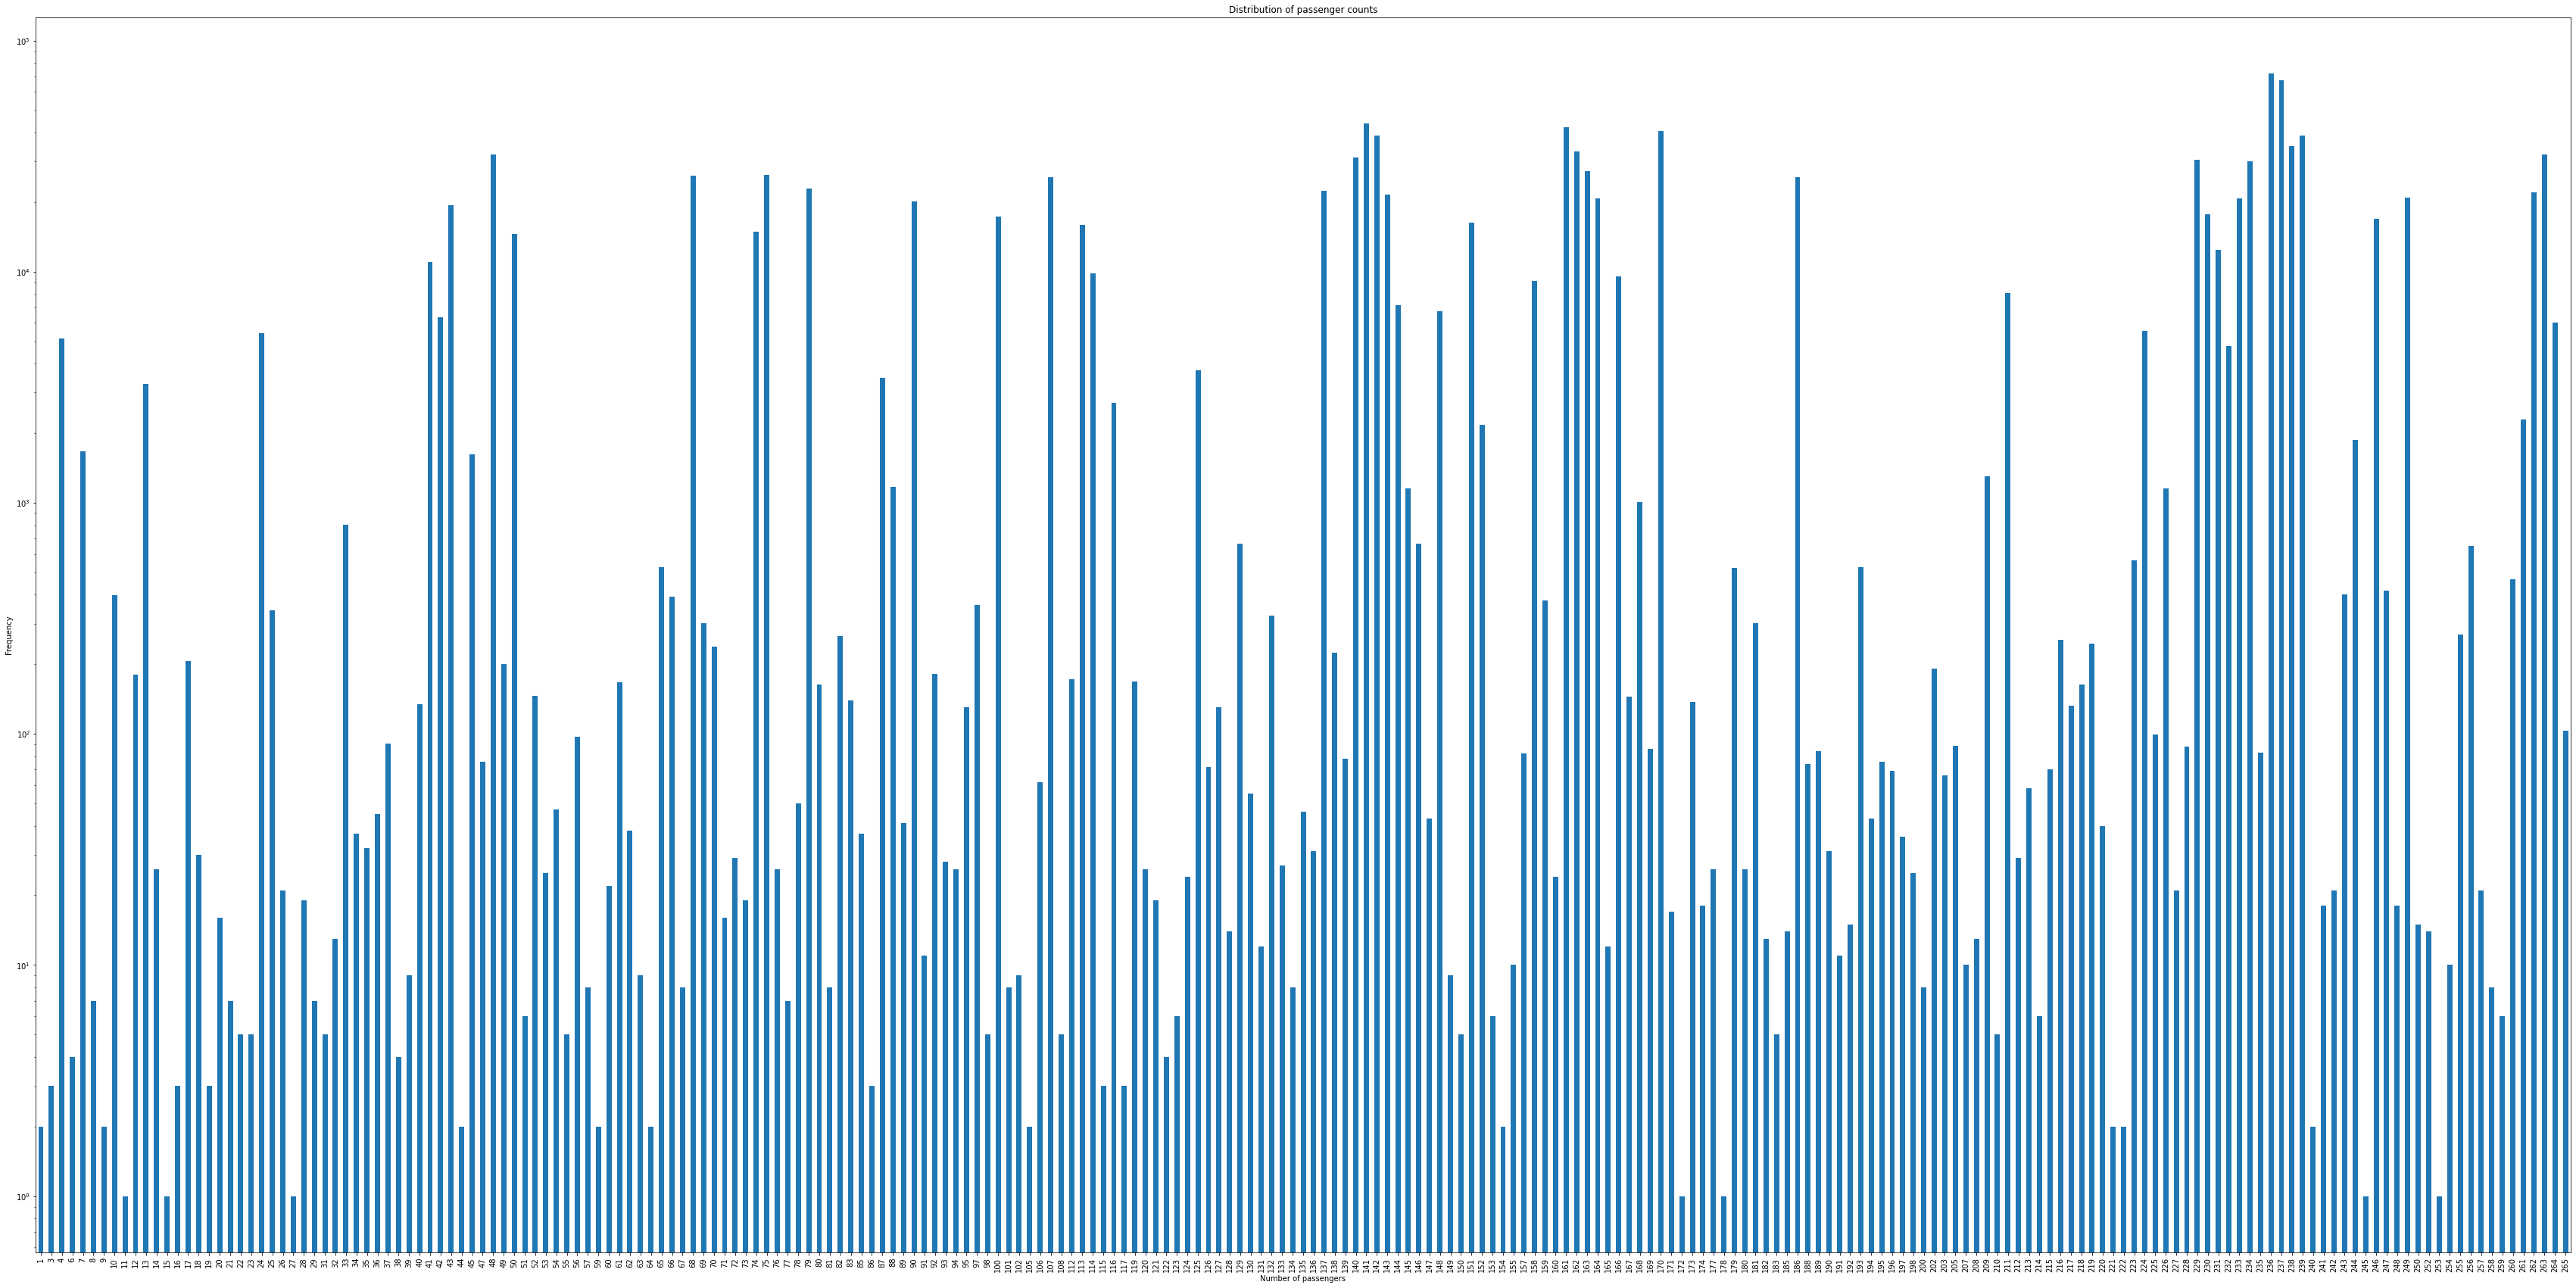

In [43]:
passengers = df11['DOLocationID'].value_counts().sort_index()
passengers.plot(kind = 'bar',logy = True, figsize = (60,30)) # bargraph of DOLocationID
plt.xlabel('Number of passengers')
plt.ylabel('Frequency')
plt.title('Distribution of passenger counts')
plt.show()

In [44]:
df11['PULocationID'].value_counts(ascending=True) #counting values of PULocationID

105        1
64         1
115        1
240        1
38         1
       ...  
239    41572
161    43248
141    44280
236    68485
237    73931
Name: PULocationID, Length: 238, dtype: int64

In [45]:
df11['DOLocationID'].value_counts(ascending=True) #counting values of DOLocationID

178        1
172        1
27         1
245        1
11         1
       ...  
170    40702
161    42170
141    43790
237    67541
236    72062
Name: DOLocationID, Length: 241, dtype: int64

In [ ]:
df11['passenger_count'].value_counts(ascending=False) #counting values of passenger_count

1.00000    885615
2.00000    159805
3.00000     41565
5.00000     32618
6.00000     21332
4.00000     15456
9.00000         1
Name: passenger_count, dtype: int64

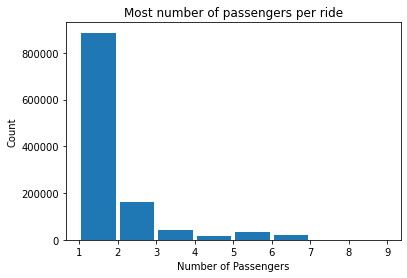

In [46]:

plt.hist(df11.passenger_count, rwidth=0.9, bins=range(1,10)) #histogram of passengers count per ride
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.title('Most number of passengers per ride')
plt.show()

In [47]:
def hr_func(ts):
    return ts.hour

df11['pickup_time_hour'] = df11['new_pickup_time'].apply(hr_func) #extracting hour from pickup time

In [48]:
df11['pickup_time_hour']

0           0
1           0
2           0
3           0
4           0
           ..
1156387    12
1156388     7
1156389    10
1156390    10
1156391    15
Name: pickup_time_hour, Length: 1156392, dtype: int64

(array([15860.,  8399.,  4495.,  2292.,  2126.,  5552., 21264., 40919.,
        58768., 59873., 65225., 71689., 79394., 81258., 87372., 86295.,
        78472., 82483., 82177., 68770., 51239., 41055., 34389., 27026.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

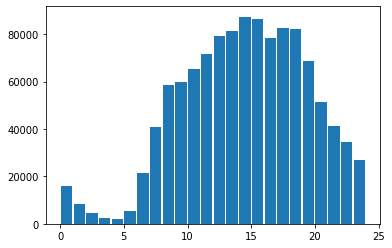

In [49]:
plt.hist(df11.pickup_time_hour, rwidth=0.9, bins=range(0,25)) #plotting histogram of pickup_time_hour

# after mid

In [ ]:
#df11.to_csv(r'df11.csv', index = False)

In [50]:
cor = df11.corr() # applying correlation

In [51]:
#Correlation with output variable
cor_target = abs(cor["final_amount"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

trip_distance   0.73011
fare_amount     0.81994
final_amount    1.00000
Name: final_amount, dtype: float64

In [52]:
X = df11.drop(["final_amount","new_pickup_date","new_dropoff_date","new_pickup_time","new_dropoff_time","store_and_fwd_flag","pickup_time_hour"],1)   #Feature Matrix and dropping few columns
y = df11["final_amount"] 

In [63]:
X

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount
0,1.00000,1.00000,2.00000,1.00000,238,143,2.00000,9.50000
1,1.00000,1.00000,2.10000,1.00000,264,230,1.00000,9.00000
2,1.00000,1.00000,1.50000,1.00000,95,102,2.00000,7.50000
3,1.00000,1.00000,3.80000,1.00000,141,260,2.00000,13.00000
4,1.00000,1.00000,1.60000,1.00000,140,233,1.00000,6.50000
...,...,...,...,...,...,...,...,...
1156387,2.00000,1.00000,0.83000,99.00000,246,186,2.00000,7.50000
1156388,2.00000,1.00000,0.97000,99.00000,166,43,2.00000,6.00000
1156389,2.00000,1.00000,1.93000,99.00000,230,107,2.00000,11.50000
1156390,2.00000,1.00000,2.04000,99.00000,236,140,2.00000,11.50000


In [53]:
# importing machine learning libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [54]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const             0.00000
VendorID          0.00000
passenger_count   0.00000
trip_distance     0.00000
RatecodeID        0.00000
PULocationID      0.00000
DOLocationID      0.00000
payment_type      0.00000
fare_amount       0.00000
dtype: float64

In [55]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount']


In [56]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False  True  True]
[1 1 1 1 1 2 1 1]


In [57]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 0
Score with 0 features: 0.000000


In [58]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount'],
      dtype='object')


In [59]:
reg = LassoCV() #implementing lasso regression
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.009768
Best score using built-in LassoCV: 0.873598


In [60]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 2 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

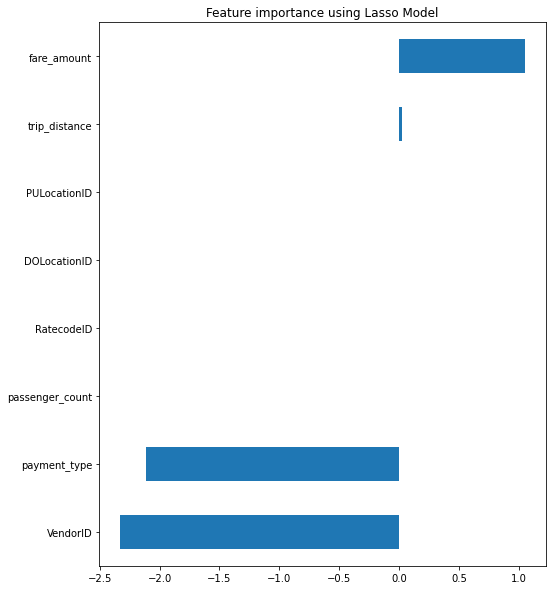

In [64]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model") #plotting features which are highly correlated using lasso regression

In [65]:
from sklearn.decomposition import PCA # implementing PCA

pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.5577639  0.4412602  0.00078287]
[[ 8.31607852e-05  7.70626092e-05  7.25199387e-04  6.49550756e-06
  -6.09855661e-01 -7.92510255e-01  4.81970014e-04  1.67262052e-03]
 [ 6.88000405e-05  4.33664155e-05 -3.43671442e-05 -8.19046596e-06
  -7.92511912e-01  6.09856368e-01  2.11483236e-05 -2.65507806e-04]
 [-6.01367195e-03 -5.23121579e-04  2.56331457e-01  5.97003289e-04
   8.90130269e-04  1.59248848e-03  5.99386286e-03  9.66549603e-01]]


In [66]:
from sklearn import preprocessing # performing min-max scaler for feature selection

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
x_after_min_max_scaler = min_max_scaler.fit_transform(X)
  
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)
  
  
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler()
  
# Scaled feature
x_after_Standardisation = Standardisation.fit_transform(X)
  
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After min max Scaling : 
 [[0.         0.         0.04901478 ... 0.53787879 0.33333333 0.45238095]
 [0.         0.         0.05147783 ... 0.86742424 0.         0.42857143]
 [0.         0.         0.03669951 ... 0.38257576 0.33333333 0.35714286]
 ...
 [1.         0.         0.04729064 ... 0.40151515 0.33333333 0.54761905]
 [1.         0.         0.05       ... 0.52651515 0.33333333 0.54761905]
 [1.         0.         0.041133   ... 0.89772727 0.33333333 0.42857143]]

After Standardisation : 
 [[-1.50800534 -0.43257853  0.71522992 ... -0.34639121  1.54073795
   0.67509343]
 [-1.50800534 -0.43257853  0.84719239 ...  0.91924715 -0.60260284
   0.48249164]
 [-1.50800534 -0.43257853  0.05541759 ... -0.94284146  1.54073795
  -0.09531373]
 ...
 [ 0.66312762 -0.43257853  0.6228562  ... -0.87010363  1.54073795
   1.44550059]
 [ 0.66312762 -0.43257853  0.76801491 ... -0.39003391  1.54073795
   1.44550059]
 [ 0.66312762 -0.43257853  0.29295003 ...  1.03562768  1.54073795
   0.48249164]]


In [67]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (809474, 8) (809474,)
Test (346918, 8) (346918,)


Feature 0: 114568.872878
Feature 1: 2054.258536
Feature 2: 924348.727675
Feature 3: 10.210072
Feature 4: 1564.128254
Feature 5: 701.595091
Feature 6: 63076.029097
Feature 7: 1662502.139237


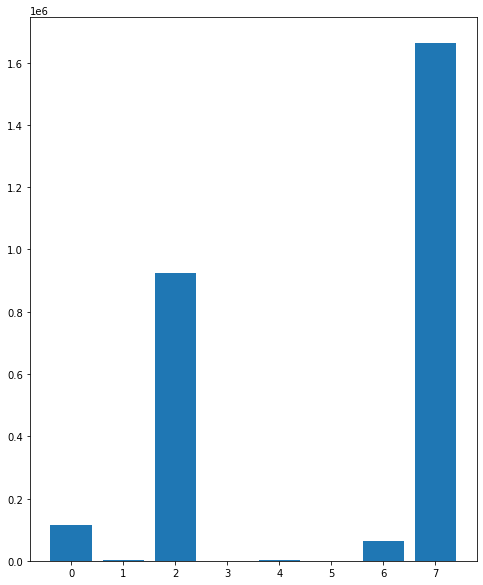

In [68]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
    fs.fit(X_train, y_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [69]:
# evaluation of a model using all input features
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.795


In [70]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [71]:
# evaluation of a model using 10 features chosen with correlation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.794


In [72]:
 X = df11.drop([ "final_amount","new_pickup_date","new_dropoff_date","new_pickup_time","new_dropoff_time","store_and_fwd_flag","pickup_time_hour"],1)   #Feature Matrix
y = df11["final_amount"]

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [74]:
X

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount
0,1.00000,1.00000,2.00000,1.00000,238,143,2.00000,9.50000
1,1.00000,1.00000,2.10000,1.00000,264,230,1.00000,9.00000
2,1.00000,1.00000,1.50000,1.00000,95,102,2.00000,7.50000
3,1.00000,1.00000,3.80000,1.00000,141,260,2.00000,13.00000
4,1.00000,1.00000,1.60000,1.00000,140,233,1.00000,6.50000
...,...,...,...,...,...,...,...,...
1156387,2.00000,1.00000,0.83000,99.00000,246,186,2.00000,7.50000
1156388,2.00000,1.00000,0.97000,99.00000,166,43,2.00000,6.00000
1156389,2.00000,1.00000,1.93000,99.00000,230,107,2.00000,11.50000
1156390,2.00000,1.00000,2.04000,99.00000,236,140,2.00000,11.50000


In [75]:
y

0         15.80000
1         17.86000
2          8.80000
3         19.30000
4         15.46000
            ...   
1156387   10.80000
1156388    6.80000
1156389   14.80000
1156390   14.80000
1156391   12.30000
Name: final_amount, Length: 1156392, dtype: float64

In [76]:
from sklearn.linear_model import LinearRegression # performing linear regression and checking its accuracy
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8727472665076168

In [77]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score # checking with cross validation where dividing training model in parts and validating it

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87342194, 0.87353011, 0.8731324 , 0.87505061, 0.87321826])

In [78]:
from sklearn.model_selection import GridSearchCV #performing grid search cv using different models for finding best parameters

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor # performing decision tree classifier algorithm

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.87367,{'normalize': True}
1,lasso,0.66631,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.88231,"{'criterion': 'mse', 'splitter': 'best'}"


In [79]:
from sklearn.ensemble import RandomForestRegressor #performing random forest regressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error # performing mean squared error

rand_forest_regressor = RandomForestRegressor()
rand_forest_regressor.fit(X_train, y_train)

y_rand_forest_predict = rand_forest_regressor.predict(X_test)
random_forest_model_error = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_rand_forest_predict)))
print(f' Random Forest Mean Squared Error - {random_forest_model_error}')

 Random Forest Mean Squared Error - 159614749.46524176


In [80]:
rand_forest_regressor.score(X_test,y_test)

0.9201849932620076

In [82]:
pip install rfpimp #installing rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-cp37-none-any.whl size=10670 sha256=5df223b4baa47be13fc1eba94844358d5e7581cdb0a22a50eaa7d5864287e7c8
  Stored in directory: /root/.cache/pip/wheels/16/08/23/9d90df482c9c943df4d6fe874c0937f8e81dc3db917c9300c2
Successfully built rfpimp


In [83]:
import rfpimp
imp = rfpimp.importances(rand_forest_regressor, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


TypeError: ignored

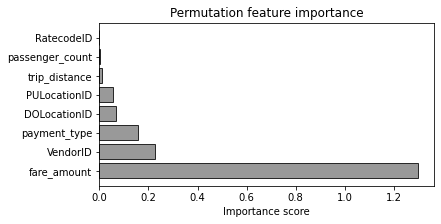

In [85]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, fontsize=12, ha='center', va='center', transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()
# checking features with permutaion and combination
fig.tight_layout()

In [86]:
from xgboost import XGBRegressor #performing XGBRegressor

In [87]:
scores = cross_val_score(XGBRegressor(), X, y, scoring='neg_mean_squared_error')

[05:51:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [88]:
# Alternative code to silence potential errors
scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X, y, scoring='neg_mean_squared_error')

In [90]:
(-scores)**0.5 

array([1.19350866, 1.05851393, 0.87503416, 0.87575623, 0.87626899])

In [91]:

# xgboost for regression
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# define dataset
# evaluate the model
model = XGBRegressor(objective='reg:squarederror')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBRegressor(objective='reg:squarederror')
model.fit(X, y)
# make a single prediction
#row = [2.0 , 1.0 , 0.80 , 99.0 , 232 , 183 , 2.0 , 10.5]
#row = asarray(row).reshape((1, len(row)))
#yhat = model.predict(row)
#print('Prediction: %.3f' % yhat[0])

MAE: -0.675 (0.003)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [92]:
model.score(X_test,y_test)

0.9147236533401735

In [93]:
import folium
import geopy
from sklearn import preprocessing, cluster #importing clustering library
import scipy  

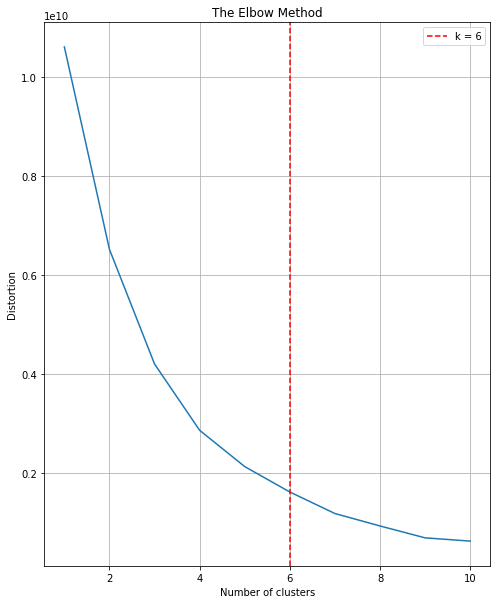

In [94]:
X = df11[["PULocationID","DOLocationID"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [95]:
k = 6
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = df11[["PULocationID","DOLocationID"]]
## clustering
df11_X = X.copy()
df11_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     df11_X.drop("cluster", axis=1).values)
df11_X["centroids"] = 0
for i in closest:
    df11_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
df11[["cluster","centroids"]] = df11_X[["cluster","centroids"]]
df11.sample(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,VendorID,new_pickup_date,new_dropoff_date,new_pickup_time,new_dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,final_amount,pickup_time_hour,cluster,centroids
892761,2.00000,2020-10-22,2020-10-22,15:32:58,15:45:03,2.00000,1.47000,1.00000,N,239,166,1.00000,9.50000,14.72000,15,0,0
234473,1.00000,2020-10-22,2020-10-22,13:48:33,13:59:13,1.00000,1.60000,1.00000,N,107,249,2.00000,8.50000,14.30000,13,1,0
796596,2.00000,2020-10-19,2020-10-19,02:35:40,02:46:07,4.00000,2.79000,1.00000,N,75,168,2.00000,11.00000,12.30000,2,5,0
547619,2.00000,2020-10-08,2020-10-08,19:48:50,19:52:22,1.00000,0.78000,1.00000,N,161,164,1.00000,4.50000,10.56000,19,4,0
153645,1.00000,2020-10-15,2020-10-15,12:39:35,12:50:06,1.00000,1.30000,1.00000,N,75,41,2.00000,8.50000,9.30000,12,2,0


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


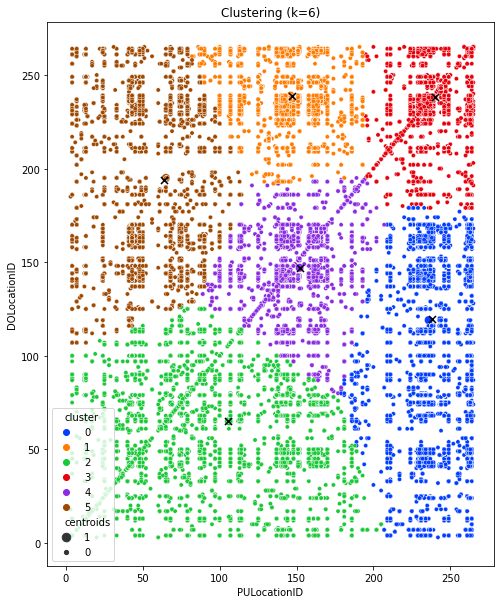

In [96]:
## ploting clusters with k=6 of mean
fig, ax = plt.subplots()
sns.scatterplot(x="PULocationID", y="DOLocationID", data=df11, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [97]:
model = cluster.AffinityPropagation()


Text(0.5, 1.0, 'Clustering (k=6)')

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


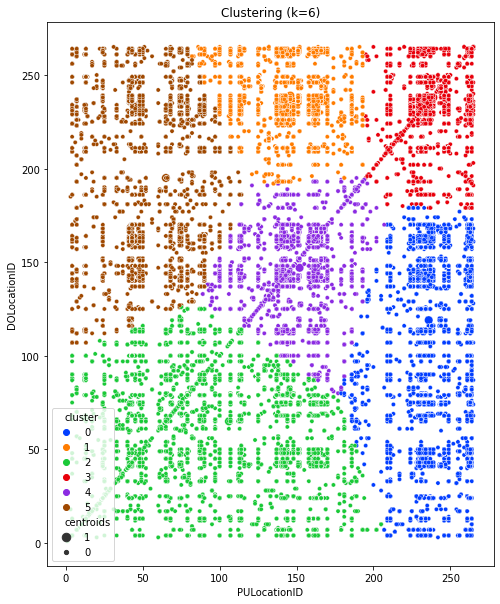

In [98]:
# ploting clusters with k=6 without mean
k = df11["cluster"].nunique()
sns.scatterplot(x="PULocationID", y="DOLocationID", data=df11, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

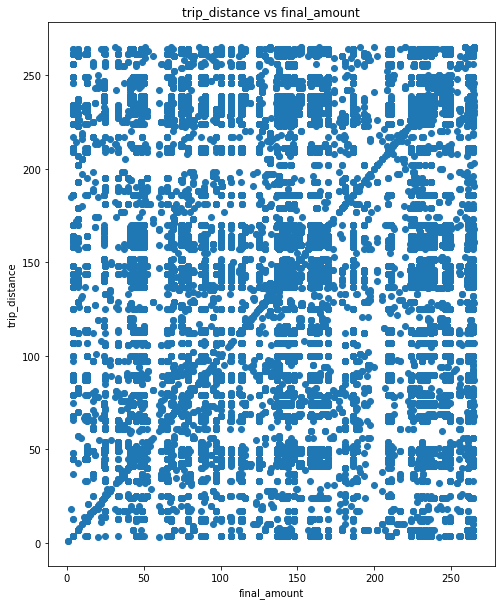

In [99]:
# scatterplot without k means
plt.scatter(df11.PULocationID, df11.DOLocationID)
plt.xlabel('final_amount')
plt.ylabel('trip_distance')
plt.title('trip_distance vs final_amount')
plt.show()

Text(0, 0.5, "y'")

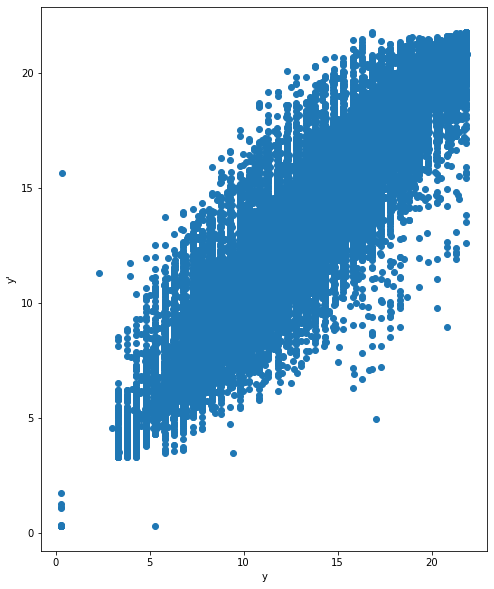

In [107]:
#prediction of random forest regressor of y and y'
predictions = rand_forest_regressor.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('y') # y_test
plt.ylabel("y'") # y'_test

In [105]:
y_test.describe()

count   346918.00000
mean        13.35521
std          3.34096
min          0.30000
25%         10.80000
50%         13.30000
75%         15.80000
max         21.88000
Name: final_amount, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


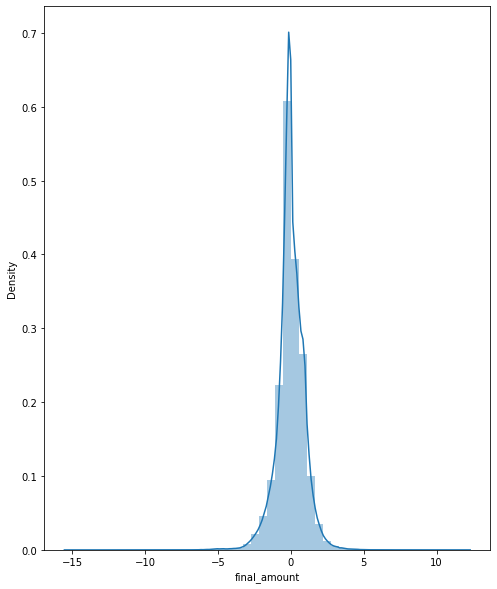

In [108]:
sns.distplot((y_test-predictions),bins=50); #plotting histogram of y_test
